In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsm
import matplotlib.pyplot as plt
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


# Section 3.2 Difference Equations

In [2]:
# Example 3.11
z = np.array([1, -1.5, .75]) # coefficients of the polynomial
a = np.polynomial.polynomial.polyroots(z)[1] # = 1+0.57735i, print one root which is 1 + i 1/sqrt(3)
arg = np.angle(a)/(2 * np.pi) # arg in cycles/pt
1/arg # = 12, the period

12.0

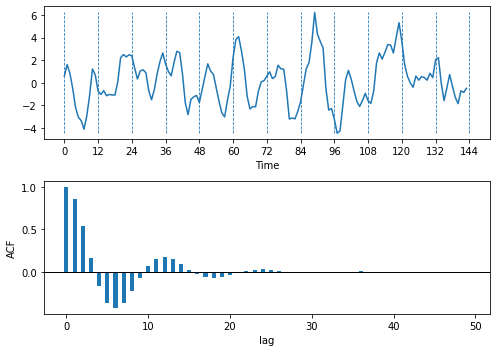

In [3]:
np.random.seed(8675309) # Jenny, it's me again
ar2 = sm.tsa.arma_generate_sample(ar=[1, -1.5, .75], ma=[1, 0], nsample=144)

xlabels = np.arange(0, 144 + 1, 12)
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(ar2)
axes[0].vlines(xlabels, ymin=min(ar2), ymax=max(ar2), linestyles="--", linewidth=.8)
axes[0].set_xticks(xlabels)
axes[0].set_xlabel("Time")

ACF = tsm.arima_process.arma_acf(ar=[1, -1.5, .75], ma=[1, 0], lags=50)
lags = np.arange(0, 50)

axes[1].bar(lags, ACF, width=.5)
axes[1].axhline(0, color="black", linewidth=1)
axes[1].set_xlabel("lag")
axes[1].set_ylabel("ACF")

fig.tight_layout()
plt.show()

In [4]:
# Example 3.12
print(tsm.arima_process.arma2ma(ar=[1, -.9], ma=[1, .5], lags=51))

[1.         1.4        1.26       1.134      1.0206     0.91854
 0.826686   0.7440174  0.66961566 0.60265409 0.54238868 0.48814982
 0.43933483 0.39540135 0.35586122 0.32027509 0.28824758 0.25942283
 0.23348054 0.21013249 0.18911924 0.17020732 0.15318658 0.13786793
 0.12408113 0.11167302 0.10050572 0.09045515 0.08140963 0.07326867
 0.0659418  0.05934762 0.05341286 0.04807157 0.04326442 0.03893797
 0.03504418 0.03153976 0.02838578 0.02554721 0.02299248 0.02069324
 0.01862391 0.01676152 0.01508537 0.01357683 0.01221915 0.01099723
 0.00989751 0.00890776 0.00801698]


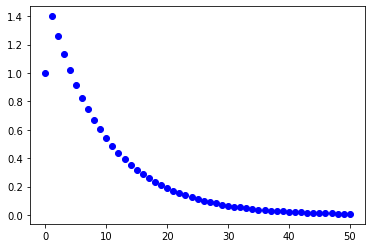

In [5]:
plt.plot(tsm.arima_process.arma2ma(ar=[1, -.9], ma=[1, .5], lags=51), "bo")
plt.show()